## Time Series Data

Time series data is another important class of data. In this session we will explore few Pandas capabilities exploring time series data. The data set that we will use for the current session is  from Kaggle https://www.kaggle.com/mahirkukreja/delhi-weather-data

In [1]:
import pandas as pd

data = pd.read_csv('data/DailyDelhiClimateTest.csv')

In [2]:
data.to_pickle('data/climateData.pickle')

In [3]:
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


Pandas offers many intuitive ways of slicing your data

print only the column of _dewptm:

In [5]:
print(data.humidity)
print(data['humidity'])


0      85.869565
1      77.222222
2      81.888889
3      70.050000
4      74.944444
         ...    
109    27.500000
110    39.375000
111    40.900000
112    27.500000
113    27.142857
Name: humidity, Length: 114, dtype: float64
0      85.869565
1      77.222222
2      81.888889
3      70.050000
4      74.944444
         ...    
109    27.500000
110    39.375000
111    40.900000
112    27.500000
113    27.142857
Name: humidity, Length: 114, dtype: float64


prints only rows 2 to 4:

In [ ]:
print(df[2:5])

provide a list of column names in order to slice multiple columns:

In [7]:
print(data[['meantemp','humidity']])

      meantemp   humidity
0    15.913043  85.869565
1    18.500000  77.222222
2    17.111111  81.888889
3    18.700000  70.050000
4    18.388889  74.944444
..         ...        ...
109  34.500000  27.500000
110  34.250000  39.375000
111  32.900000  40.900000
112  32.875000  27.500000
113  32.000000  27.142857

[114 rows x 2 columns]


df.loc can slice multiple columns and rows at the same time. You can think of its inputs as a combination of normal python list indexing and pandas column indexing as shown previously

print rows 2 to 4 of the columns meantemp and humidity:

In [9]:
print(data.loc[2:5, ['meantemp','humidity']])

    meantemp   humidity
2  17.111111  81.888889
3  18.700000  70.050000
4  18.388889  74.944444
5  19.318182  79.318182


In [10]:
data.loc[0:31,'meantemp'].mean()

15.696470314024474

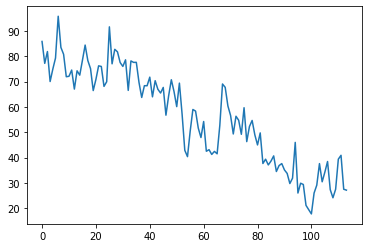

In [11]:
data['humidity'].plot()

In [ ]:
data = pd.read_csv('data/DailyDelhiClimateTest.csv',index_col='date')

In [ ]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


<AxesSubplot:xlabel='date'>

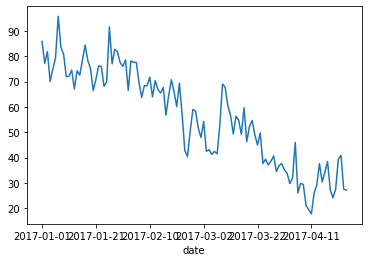

In [ ]:
data['humidity'].plot()

In [ ]:
# help(data.resample)

In [ ]:
data.index

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18', '2017-04-19',
       '2017-04-20', '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24'],
      dtype='object', name='date', length=114)

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=114, freq=None)

We can use the resample function to return a unique sampling distribution of a time series about a given frequency. In this example we use 'M' to resample with each month as a frequency. 

In [ ]:
data.resample('M').mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-31,15.710873,77.188256,7.162982,986.767947
2017-02-28,18.349981,64.375728,7.566294,1015.574251
2017-03-31,23.753760,48.009694,8.884385,1010.469641
2017-04-30,30.753663,30.408185,9.128446,1004.564831


<AxesSubplot:xlabel='date'>

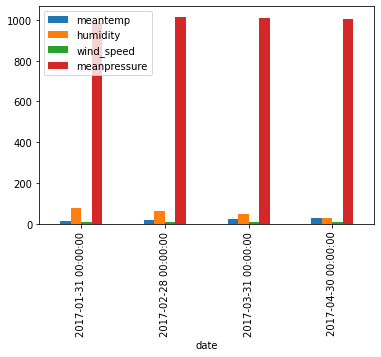

In [ ]:
data.resample('M').mean().plot(kind="bar")